<a href="https://colab.research.google.com/github/kalki81000/Machine-Learning-Revision-Last-2025-/blob/main/lass_ridge_elastic_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("boston.csv")

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

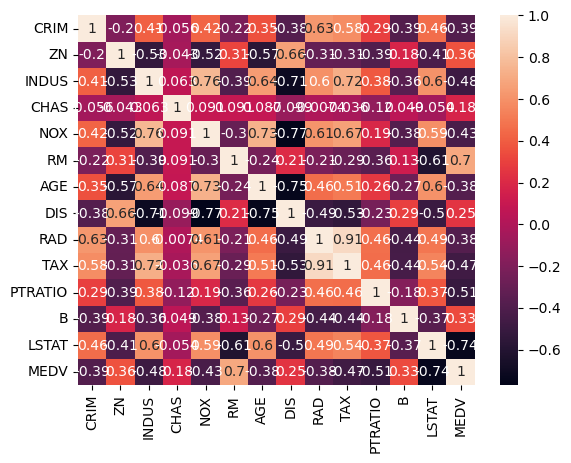

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536



KeyboardInterrupt



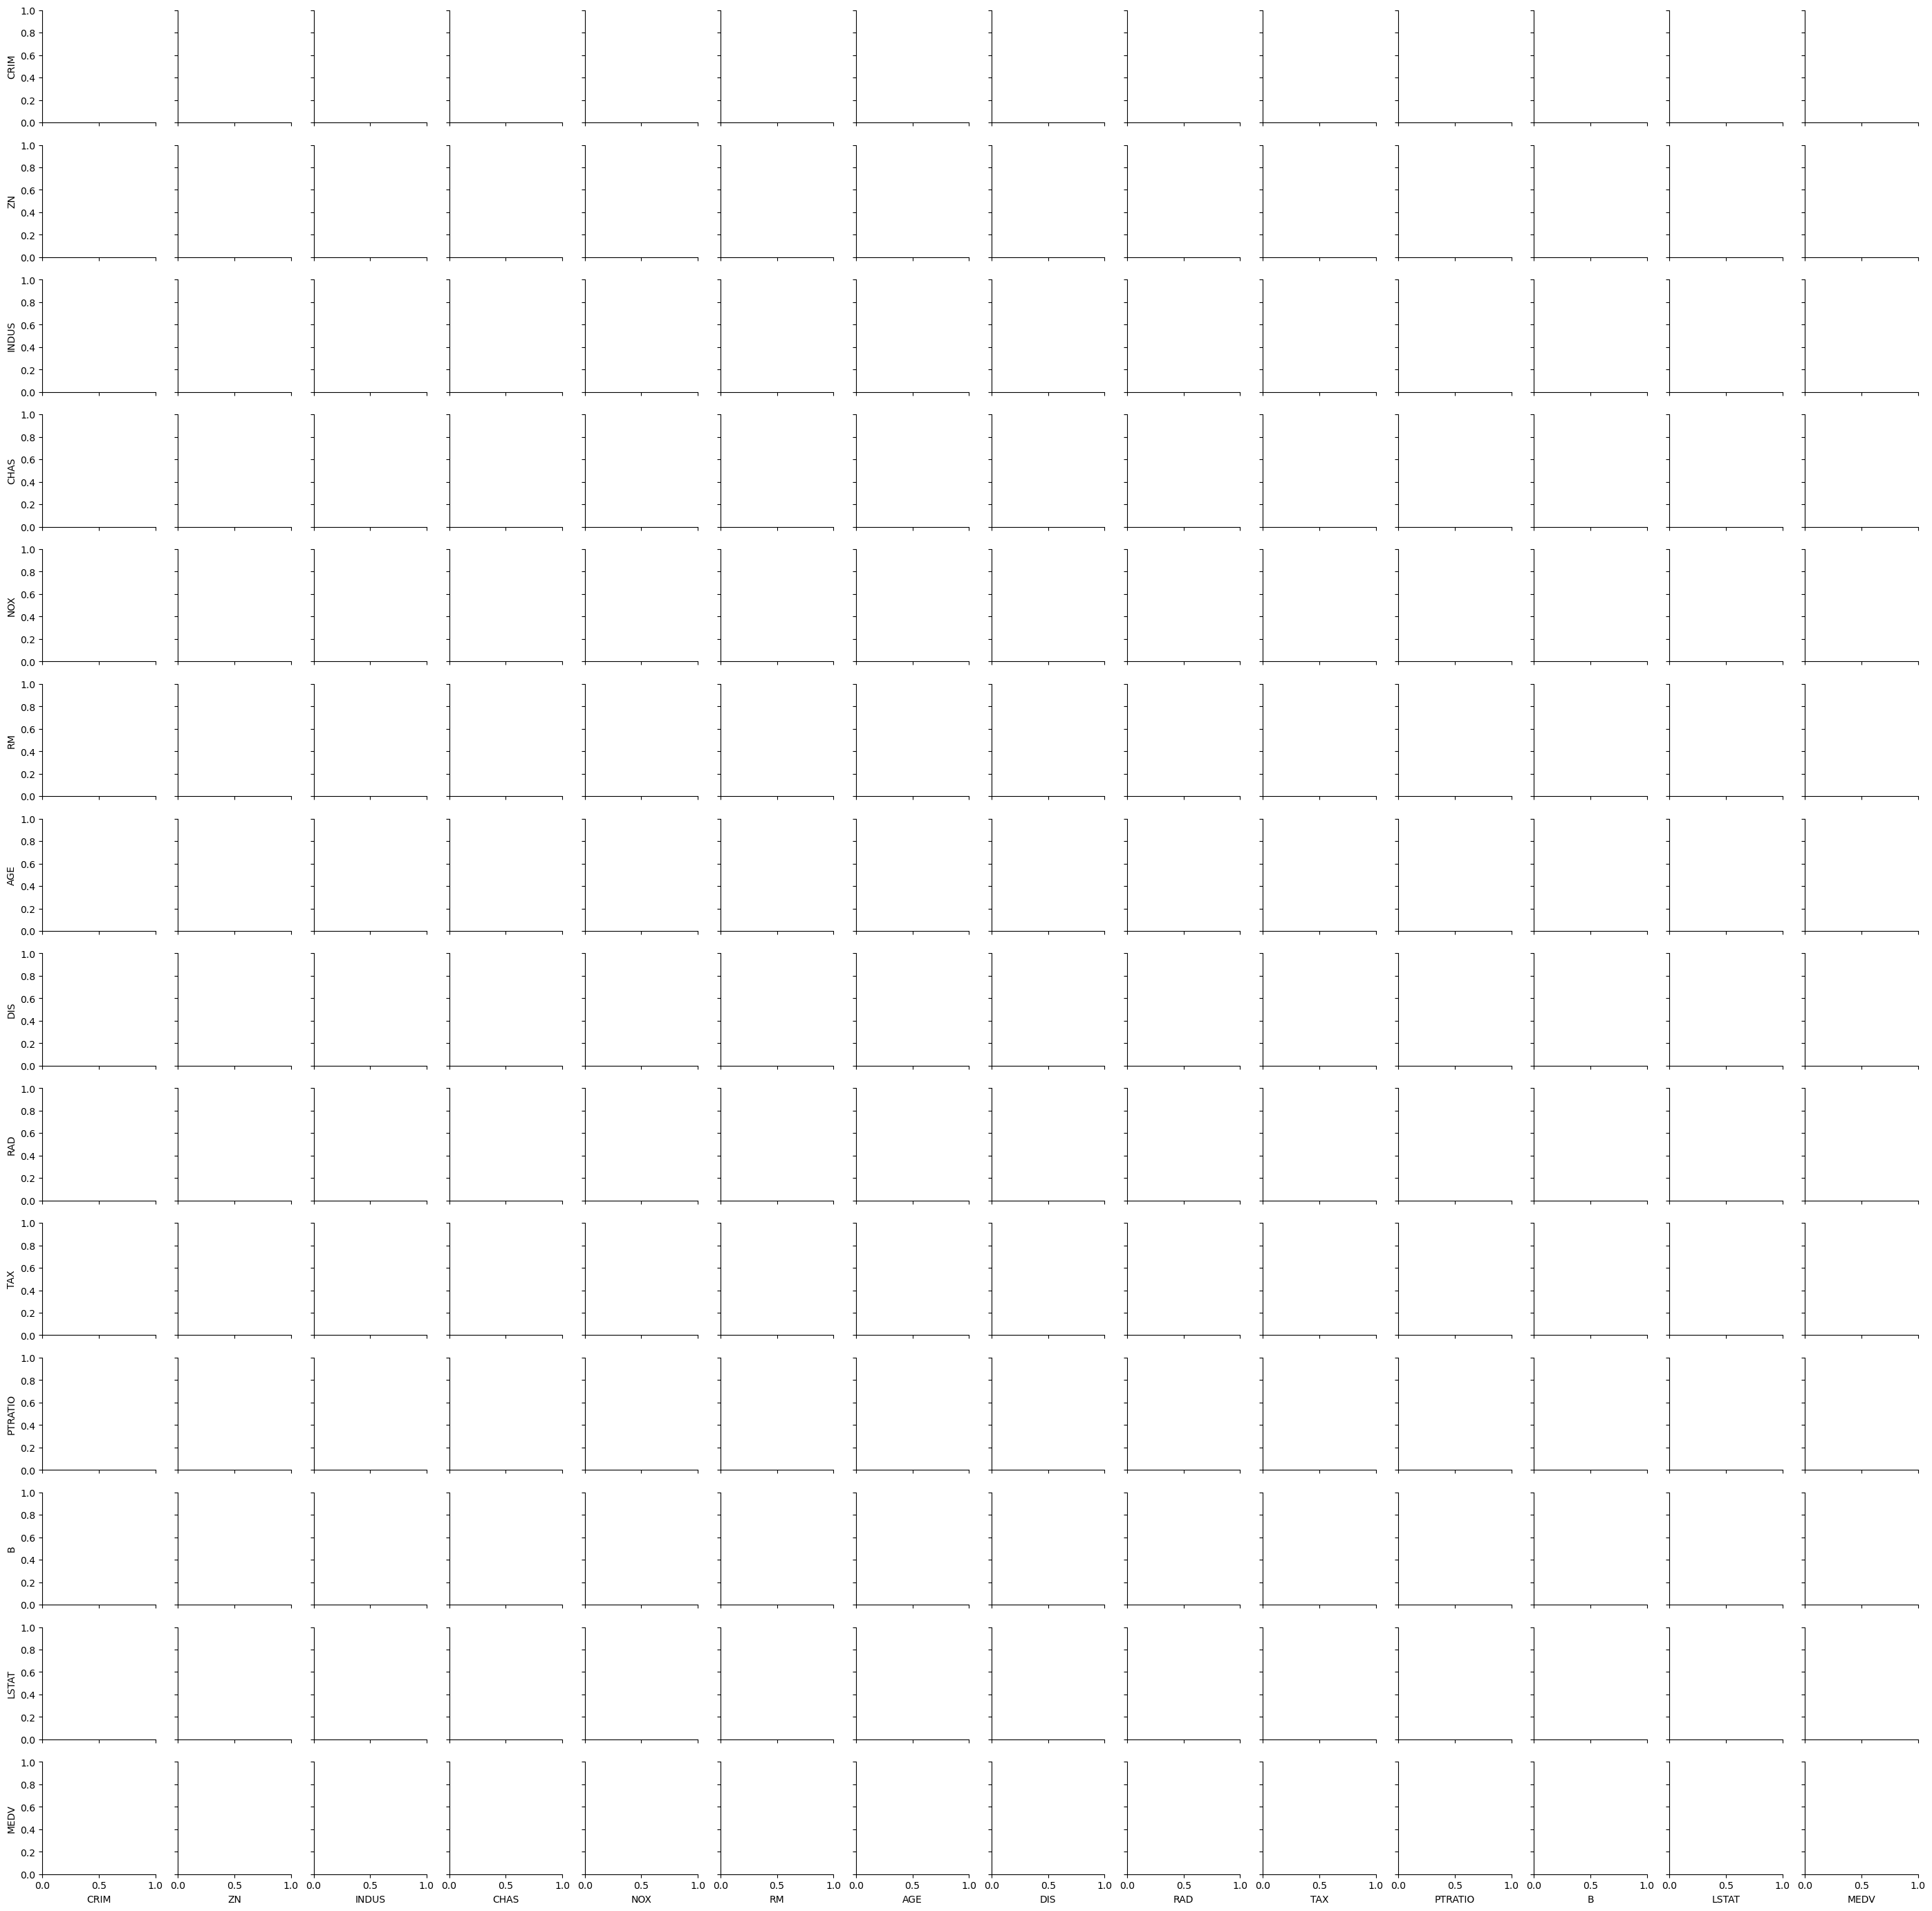

In [ ]:
sns.pairplot(df)

In [ ]:

#sepearet X and y
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284.0,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666.0,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252.0,18.3,395.63,4.32
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666.0,20.2,354.70,7.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,0.392,5.876,19.1,9.2203,1,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0,0.507,6.086,61.5,3.6519,8,307.0,17.4,376.75,10.88


In [ ]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276.0,18.0,357.98,6.65
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188.0,19.1,378.09,17.93
260,0.54011,20.0,3.97,0,0.647,7.203,81.8,2.1121,5,264.0,13.0,392.80,9.59


In [ ]:
#multiple linear regression model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model

LinearRegression()

In [ ]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficients of {col_name} is , {regression_model.coef_[i]}")


The coefficients of CRIM is , -0.09854247168320639
The coefficients of ZN is , 0.06078411384244005
The coefficients of INDUS is , 0.059171540065620754
The coefficients of CHAS is , 2.439559875155024
The coefficients of NOX is , -21.469964963213375
The coefficients of RM is , 2.795813854535842
The coefficients of AGE is , 0.003574597775936602
The coefficients of DIS is , -1.5162721842398545
The coefficients of RAD is , 0.3075417454645229
The coefficients of TAX is , -0.011280016635396836
The coefficients of PTRATIO is , -1.0054664025594255
The coefficients of B is , 0.006450184460880751
The coefficients of LSTAT is , -0.5688345385334825


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_linear = regression_model.predict(X_test)
r2_score(y_test, y_pred_linear)

0.7836295385076258

In [ ]:
##ridge regression
from sklearn.linear_model import Ridge
ridge_reg_model = Ridge(alpha = 0.1)
ridge_reg_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficients of {col_name} is , {ridge_reg_model.coef_[i]}")


The coefficients of CRIM is , -0.0970157233747312
The coefficients of ZN is , 0.060990240265362906
The coefficients of INDUS is , 0.05094942455252873
The coefficients of CHAS is , 2.4092103089660126
The coefficients of NOX is , -19.693076514219545
The coefficients of RM is , 2.8155076955384275
The coefficients of AGE is , 0.0020887239263773605
The coefficients of DIS is , -1.4907768506958108
The coefficients of RAD is , 0.3032556362771954
The coefficients of TAX is , -0.011449862914643203
The coefficients of PTRATIO is , -0.9841705232998642
The coefficients of B is , 0.006563817932645691
The coefficients of LSTAT is , -0.5706252848104045


In [ ]:
y_pred_ridge = ridge_reg_model.predict(X_test)
r2_score(y_test, y_pred_ridge)

0.7851038126487189

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [ ]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficients of {col_name} is , {lasso.coef_[i]}")


The coefficients of CRIM is , -0.0687396221399193
The coefficients of ZN is , 0.06247320084824938
The coefficients of INDUS is , -0.0
The coefficients of CHAS is , 0.0
The coefficients of NOX is , -0.0
The coefficients of RM is , 1.56940334386228
The coefficients of AGE is , 0.003097400767853842
The coefficients of DIS is , -0.9001613698913687
The coefficients of RAD is , 0.2613342120919243
The coefficients of TAX is , -0.01402256664449746
The coefficients of PTRATIO is , -0.7459889416480537
The coefficients of B is , 0.007094796574085388
The coefficients of LSTAT is , -0.6968326954756532


In [ ]:
y_pred_lasso = lasso.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.7390320547059955

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1, l1_ratio = 0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=1)

In [ ]:
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficients of {col_name} is , {model.coef_[i]}")


The coefficients of CRIM is , -0.06892061815865963
The coefficients of ZN is , 0.06229228865488253
The coefficients of INDUS is , -0.0
The coefficients of CHAS is , 0.0
The coefficients of NOX is , -0.0
The coefficients of RM is , 0.6062149303189481
The coefficients of AGE is , 0.015064989197614675
The coefficients of DIS is , -0.6902269813063315
The coefficients of RAD is , 0.26553587891525293
The coefficients of TAX is , -0.013870451154254356
The coefficients of PTRATIO is , -0.7155135244379498
The coefficients of B is , 0.006398521184872331
The coefficients of LSTAT is , -0.7546834089436817


In [ ]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.6998164298907721